# Introduction to Machine learning

Tutorial is based on Scikit-learn python library

Deep learning frameworks:<br>
- Tensorflow
- CNTK
- Keras
- Pytorch
- Caffe
- etc...

## Generation of toy data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

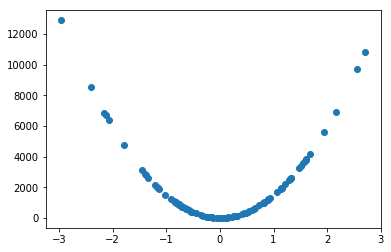

In [2]:
# generate regression dataset
x, y = make_regression(n_samples=100, n_features=1, noise=0.1)
y = y**2
# plot regression dataset
plt.scatter(x,y)
plt.show()

## Split train/test dataset

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Other data seperation methods can be found in this like: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

## Define and train model

### Linear models

In [5]:
from sklearn import linear_model
from sklearn.metrics import r2_score

In [6]:
reg = linear_model.LassoLars(alpha=.1)

In [7]:
reg.fit(X_train,y_train)

LassoLars(alpha=0.1, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [8]:
y_hat = reg.predict(X_test)

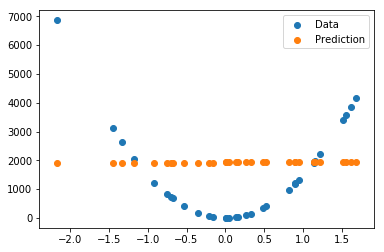

R^2:  -0.09584728333111192


In [9]:
plt.scatter(X_test,y_test,label='Data')
plt.scatter(X_test,y_hat,label='Prediction')
plt.legend()
plt.show()
print('R^2: ',r2_score(y_test, y_hat, multioutput='variance_weighted'))

#### Lineraisation of data (a method of Feature engineering)

More info: http://www.mrwaynesclass.com/labs/reading/index06.html

In [10]:
X_train_linearise = X_train**2
X_test_linearise = X_test**2

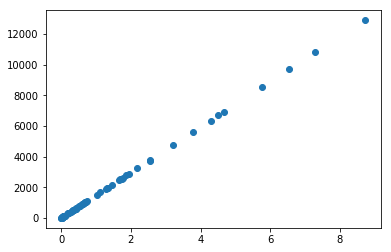

In [11]:
plt.scatter(X_train_linearise,y_train)
plt.show()

In [12]:
reg1 = linear_model.LassoLars(alpha=.1)
reg.fit(X_train_linearise,y_train)

LassoLars(alpha=0.1, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

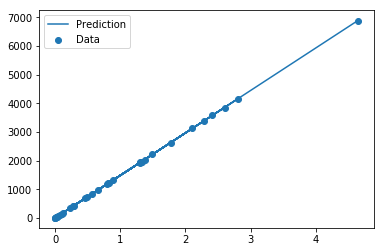

R^2:  0.9999612866017137


In [13]:
y_hat = reg.predict(X_test_linearise)

plt.scatter(X_test_linearise,y_test,label='Data')
plt.plot(X_test_linearise,y_hat,label='Prediction')
plt.legend()
plt.show()
print('R^2: ',r2_score(y_test, y_hat, multioutput='variance_weighted'))

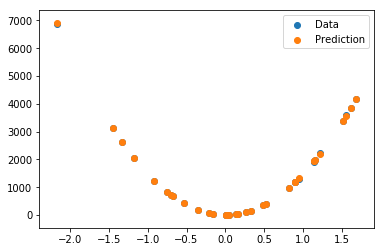

R^2:  0.9999612866017137


In [14]:
plt.scatter(X_test,y_test,label='Data')
plt.scatter(X_test,y_hat,label='Prediction')
plt.legend()
plt.show()
print('R^2: ',r2_score(y_test, y_hat, multioutput='variance_weighted'))

## Non-linear model

Understand Support Vector Machine: https://www.youtube.com/watch?v=-Z4aojJ-pdg

In [15]:
from sklearn.svm import SVR

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [17]:
reg3 = SVR(kernel='rbf', C=1e3, gamma=0.5)

In [18]:
reg3.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.5,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

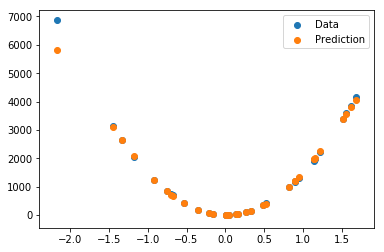

R^2:  0.9864009575063498


In [19]:
y_hat = reg3.predict(X_test)
plt.scatter(X_test,y_test,label='Data')
plt.scatter(X_test,y_hat,label='Prediction')
plt.legend()
plt.show()
print('R^2: ',r2_score(y_test, y_hat, multioutput='variance_weighted'))

### Tuning of hyper parameters 

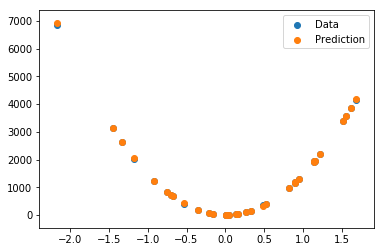

R^2:  0.9999162251463061


In [20]:
reg4 = SVR(kernel='rbf', C=50e3, gamma=0.09)
reg4.fit(X_train, y_train)

y_hat = reg4.predict(X_test)
plt.scatter(X_test,y_test,label='Data')
plt.scatter(X_test,y_hat,label='Prediction')
plt.legend()
plt.show()
print('R^2: ',r2_score(y_test, y_hat, multioutput='variance_weighted'))

# Miscellaneous 

__Steps to improve model accuracy__

- Data normalization or scaling are important for algorithms to enable easy convergence. Link:http://scikit-learn.org/stable/modules/preprocessing.html
- Select appropriate features/input parameters for getting high model accuracy (also referred as feature selection)
- Create new features to enable easy convergence (also referred as feature engineering). Eg: Linearization of data 
- Tune hyper parameters to improve accuracy 